<a href="https://colab.research.google.com/github/kaguya1997/Signal-System/blob/main/B0529015_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
from thinkdsp import decorate

### Exercise 2.2

A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called `SawtoothSignal` that extends `Signal` and provides `evaluate` to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves? 

### Solution

這裡是使用三角波來改出鋸齒波

In [ ]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

以下是播放出來的audio

In [ ]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

以下是該wave的spectrum

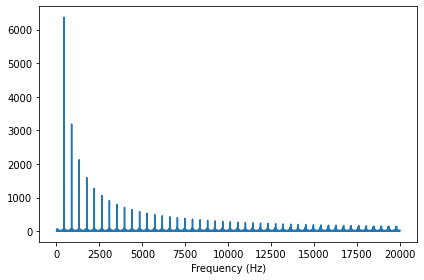

In [ ]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

以下是鋸齒波(灰)與方波(藍)的對比，其中，我另外將方波的振幅降低一半來方便比較。
可以看到它們下降的幅度是差不多的，只是中間會有間隔。

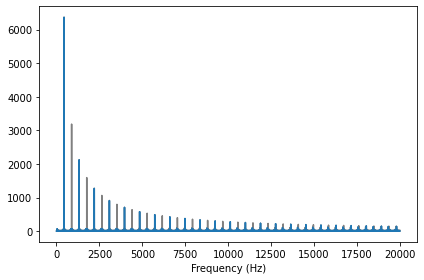

In [ ]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color = 'gray')
square = SquareSignal(amp = 0.5).make_wave(duration = 0.5, framerate = 40000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

以下是鋸齒波(灰)與三角波(藍)的對比，一樣對三角波進行了振幅的調整，可以看到三角波衰減的幅度非常的快。

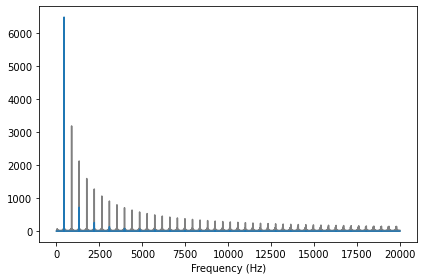

In [ ]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color = 'gray')
triangle = TriangleSignal(amp = 0.8).make_wave(duration = 0.5, framerate = 40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

### Exercise 2.3

Make a square signal at 1500 Hz and make a wave that samples it
at 10000 frames per second.  If you plot the spectrum, you can
see that most of the harmonics are aliased.
When you listen to the wave, can you hear the aliased harmonics? 

### Solution

先產生題目要求的方波:

In [ ]:
square = SquareSignal(1500).make_wave(duration=0.5, framerate=10000)

以下是該wave的spectrum:

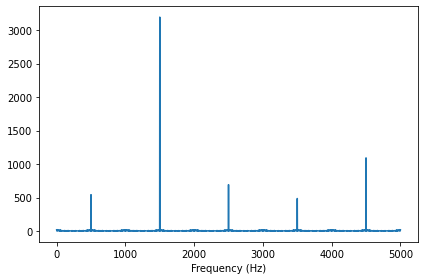

In [ ]:
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')


圖中可以看到，基波位於1500Hz，而第一個諧波出現在4500Hz，但是第二個諧波理應出現在7500Hz卻失真而位於2500Hz。同樣的，理應出現在10500Hz的第三個諧波也失真而位於500Hz；理應出現在13500Hz的第四個諧波也失真而位於3500Hz；最後第五個諧波從16500Hz失真而位於1500Hz，並與基波產生重疊。

In [ ]:
square.make_audio()

也因此，聽起來會跟下面的正弦波會產生明顯的差別。

In [ ]:
from thinkdsp import SinSignal

SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

### Exercise 2.4

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that the frequencies start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1.    Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2.    Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3.    Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

### Solution

產生題目要求的三角波:

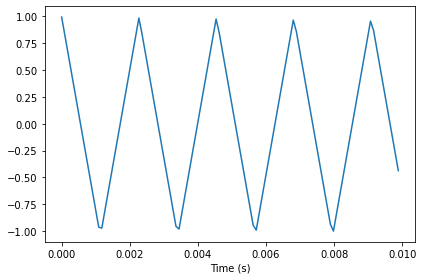

In [ ]:
triangle = TriangleSignal(440).make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (s)')

下面是print`spectrum.hs[0]`的結果，可以看到是一個非常接近0的複數。

In [ ]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

下面是將這個元素設為100後並作圖比較的結果，灰色是原本三角波的頻譜，而藍色則是修改後的頻譜，可以看到相對於原本的頻譜產生了一個垂直的位移。

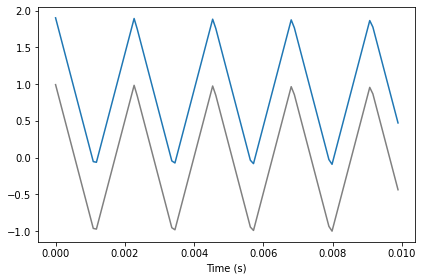

In [ ]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

### Exercise 2.5

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

### Solution

In [ ]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [ ]:
if not os.path.exists('573602__acollier123__vibrato-piano-c.wav'):
    !wget https://github.com/kaguya1997/Signal-System/raw/main/573602__acollier123__vibrato-piano-c.wav

In [ ]:
from thinkdsp import read_wave
wave = read_wave('573602__acollier123__vibrato-piano-c.wav')
wave.normalize()
wave.make_audio()

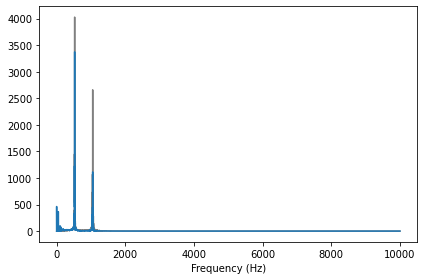

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [ ]:
filtered = spectrum.make_wave()
filtered.make_audio()

### Exercise 2.6

The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could
construct the signal you want by adding up sinusoids, or you
could start with a signal that is similar to what you want and
modify it.

### Solution

先產生一個鋸齒波(同時具有我們所需要的奇、偶諧波):

In [ ]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.make_audio()

以下是該波的頻譜，可以看到下降的幅度是$1/f$.

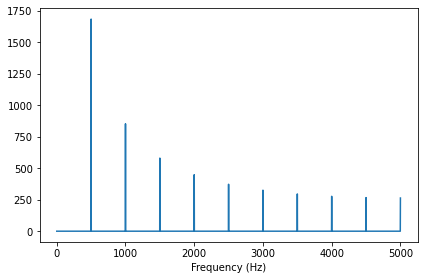

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

如果使用上一題的濾波器，可以得到一個以$1/f^2$下降的頻譜。(灰色為原鋸齒波，藍色為經過濾波器處理的波)

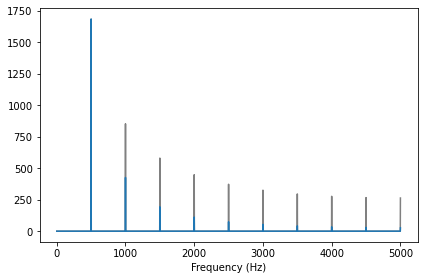

In [ ]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

以下是經過濾波器後的聲音:

In [ ]:
wave = spectrum.make_wave()
wave.make_audio()